# FIFA DATA CLEANING AND ANALYSIS

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("fifa21_raw_data_v2.csv")
df

/var/folders/7p/tcvlk2_54z7dccynx5nw_6g80000gn/T/ipykernel_76935/2264672991.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fifa21_raw_data_v2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,"Jul 13, 2018",NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,51,CAM,"Aug 1, 2020",NaN,€130K,€500,€165K,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

# DATA CLEANING

In [36]:
fifa = df.copy()
fifa.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [37]:
fifa['Club'].dtype

dtype('O')

In [38]:
fifa['Club'] = fifa['Club'].str.strip()

In [39]:
fifa.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


In [40]:
# Splitting the Contract column and adding new columns

def extract_contract_info(contract):
    if contract == 'Free' or 'On Loan' in contract:
        start_date = np.nan
        end_date = np.nan
        contract_length = 0
    else:
        start_date, end_date = contract.split(' ~ ')
        start_year = int(start_date[:4])
        end_year = int(end_date[:4])
        contract_length = end_year - start_year
    return start_date, end_date, contract_length

# apply function to contract column and create new columns

new_cols = ['Contract Start', 'Contract End', 'Contract Length(years)']
new_data = fifa['Contract'].apply(lambda x: pd.Series(extract_contract_info(x)))

for i in range(len(new_cols)):
    fifa.insert(loc=fifa.columns.get_loc('Contract')+1+i, column=new_cols[i], value=new_data[i])

In [41]:
fifa.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004,2021,17.0,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018,2022,4.0,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014,2023,9.0,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,2015,2023,8.0,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,2017,2022,5.0,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [42]:
fifa['Contract Length(years)']=fifa['Contract Length(years)'].astype('int')
fifa.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004,2021,17,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018,2022,4,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014,2023,9,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,2015,2023,8,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,2017,2022,5,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [43]:
# creating contract status column

def categories_contract_status(contract):
    if contract == 'Free':
        return 'Free'
    elif 'On Loan' in contract:
        return 'On Loan'
    else:
        return 'Contract'
    
# add contract status column
fifa. insert(fifa.columns.get_loc('Contract Length(years)')+1, 'Contract Status', fifa['Contract'].apply(categories_contract_status))
fifa.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004,2021,17,Contract,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018,2022,4,Contract,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014,2023,9,Contract,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


In [44]:
fifa[['Contract', 'Contract Start', 'Contract End', 'Contract Length(years)', 'Contract Status']].head(5)

,Contract,Contract Start,Contract End,Contract Length(years),Contract Status
0,2004 ~ 2021,2004,2021,17,Contract
1,2018 ~ 2022,2018,2022,4,Contract
2,2014 ~ 2023,2014,2023,9,Contract
3,2015 ~ 2023,2015,2023,8,Contract
4,2017 ~ 2022,2017,2022,5,Contract


In [45]:
# Height Conversion

def convert_height(height):
    if "cm" in height:
        return int(height.strip("cm"))
    else:
        feet, inches = height.split("'")
        total_inches = int(feet)*12 + int(inches.strip('"'))
        return round(total_inches* 2.54)
# apply fn to height column
fifa['Height'] = fifa['Height'].apply(convert_height)
fifa['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155])

In [46]:
fifa = fifa.rename(columns={'Height':"Height(cm)"})
fifa.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004,2021,17,Contract,"RW, ST, CF",170,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018,2022,4,Contract,"ST, LW",187,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014,2023,9,Contract,GK,188,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


In [47]:
#Weight Conversion

def convert_weight(weight):
    if "kg" in weight:
        return int(weight.strip("kg"))
    else:
        pounds = int(weight.strip("lbs"))
        return round(pounds/2.205)
# apply fn to weight column
fifa['Weight'] = fifa['Weight'].apply(convert_weight)
fifa['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

In [48]:
fifa = fifa.rename(columns={"Weight":"Weight(kg)"})
fifa.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004,2021,17,Contract,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018,2022,4,Contract,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014,2023,9,Contract,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150


In [49]:
fifa['Loan Date End'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [50]:
on_loan = fifa[fifa['Contract Status'] == 'On Loan']
on_loan[['Contract', 'Contract Status', 'Loan Date End']]

,Contract,Contract Status,Loan Date End
205,"Jun 30, 2021 On Loan",On Loan,"Jun 30, 2021"
248,"Jun 30, 2021 On Loan",On Loan,"Jun 30, 2021"
254,"Jun 30, 2021 On Loan",On Loan,"Jun 30, 2021"
302,"Jun 30, 2021 On Loan",On Loan,"Jun 30, 2021"
306,"Jun 30, 2021 On Loan",On Loan,"Jun 30, 2021"
...,...,...,...
18472,"Aug 31, 2021 On Loan",On Loan,"Aug 31, 2021"
18571,"Jun 30, 2021 On Loan",On Loan,"Jun 30, 2021"
18600,"Dec 31, 2020 On Loan",On Loan,"Dec 31, 2020"
18622,"Dec 31, 2020 On Loan",On Loan,"Dec 31, 2020"


In [51]:
fifa['W/F'].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

In [52]:
# to remove the star rating

fifa['W/F']= fifa['W/F'].str.replace('★',"")
fifa['W/F'].unique()

array(['4 ', '3 ', '5 ', '2 ', '1 '], dtype=object)

In [53]:
fifa["Joined"].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Jul 16, 2014', ..., 'Sep 22, 2018',
       'Feb 28, 2015', 'Mar 6, 2018'], dtype=object)

In [54]:
fifa["Joined"] = pd.to_datetime(fifa["Joined"])

In [55]:
fifa['Joined'].dtype

dtype('<M8[ns]')

In [56]:
#splitting the Joined column into year,month, day

fifa['Year'] = fifa['Joined'].dt.year
fifa['Month'] = fifa['Joined'].dt.month
fifa['Day'] = fifa['Joined'].dt.day
fifa.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004,2021,17,Contract,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2004,7,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018,2022,4,Contract,"ST, LW",187,83,Right,92,ST,2018-07-10,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5★,High,Low,5 ★,89,93,81,89,35,77,562,2018,7,10
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014,2023,9,Contract,GK,188,87,Right,91,GK,2014-07-16,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,2014,7,16
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,2015,2023,8,Contract,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4★,High,High,4 ★,76,86,93,88,64,78,207,2015,8,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,2017,2022,5,Contract,"LW, CAM",175,68,Right,91,LW,2017-08-03,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5★,High,Medium,5 ★,91,85,86,94,36,59,595,2017,8,3


In [57]:
# converting the month into text
import calendar
fifa['Month'] = fifa['Month'].apply(lambda x: calendar.month_abbr[x])
fifa.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004,2021,17,Contract,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2004,Jul,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018,2022,4,Contract,"ST, LW",187,83,Right,92,ST,2018-07-10,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5★,High,Low,5 ★,89,93,81,89,35,77,562,2018,Jul,10
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014,2023,9,Contract,GK,188,87,Right,91,GK,2014-07-16,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,2014,Jul,16
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,2015,2023,8,Contract,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4★,High,High,4 ★,76,86,93,88,64,78,207,2015,Aug,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,2017,2022,5,Contract,"LW, CAM",175,68,Right,91,LW,2017-08-03,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5★,High,Medium,5 ★,91,85,86,94,36,59,595,2017,Aug,3


In [58]:
# converting Value, Wage, Release clause to integers

fifa['Value'] = fifa['Value'].str.replace("€", "")
fifa['Wage'] = fifa['Wage'].str.replace("€", "")
fifa['Release Clause'] = fifa['Release Clause'].str.replace("€", "")

fifa['Value']=fifa['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
fifa['Wage']=fifa['Wage'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
fifa['Release Clause']=fifa['Release Clause'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

fifa = fifa.rename(columns={"Value":"Value(€)"})
fifa = fifa.rename(columns={"Wage":"Wage(€)"})
fifa = fifa.rename(columns={"Release Clause":"Release Clause(€)"})
fifa.head(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004,2021,17,Contract,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,NaN,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2004,Jul,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018,2022,4,Contract,"ST, LW",187,83,Right,92,ST,2018-07-10,NaN,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5★,High,Low,5 ★,89,93,81,89,35,77,562,2018,Jul,10
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014,2023,9,Contract,GK,188,87,Right,91,GK,2014-07-16,NaN,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,2014,Jul,16
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,2015,2023,8,Contract,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaN,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4★,High,High,4 ★,76,86,93,88,64,78,207,2015,Aug,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,2017,2022,5,Contract,"LW, CAM",175,68,Right,91,LW,2017-08-03,NaN,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5★,High,Medium,5 ★,91,85,86,94,36,59,595,2017,Aug,3


# DATA ANALYSIS

In [59]:
fifa['Nationality'].value_counts()

England                1705
Germany                1195
Spain                  1065
France                 1003
Argentina               943
                       ... 
Malawi                    1
Rwanda                    1
São Tomé & Príncipe       1
Aruba                     1
Indonesia                 1
Name: Nationality, Length: 164, dtype: int64

In [60]:
fifa['Nationality'].value_counts()[0:8]

England        1705
Germany        1195
Spain          1065
France         1003
Argentina       943
Brazil          887
Japan           485
Netherlands     438
Name: Nationality, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

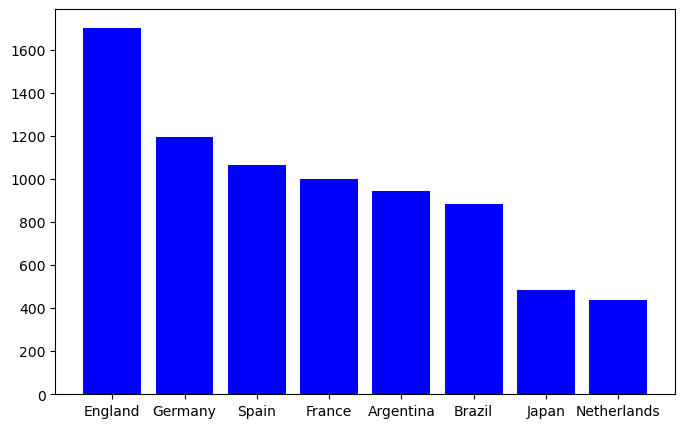

In [61]:
plt.figure(figsize=(8,5))
plt.bar(list(fifa['Nationality'].value_counts()[0:8].keys()),list(fifa['Nationality'].value_counts()[0:8]),color='b')
plt.show

In [62]:
player_salary = fifa[['Name', 'Wage(€)']]
player_salary.head(5)

,Name,Wage(€)
0,L. Messi,560000
1,Cristiano Ronaldo,220000
2,J. Oblak,125000
3,K. De Bruyne,370000
4,Neymar Jr,270000


In [63]:
player_salary=player_salary.sort_values(by=['Wage(€)'],ascending=False)
player_salary.head(5)

,Name,Wage(€)
0,L. Messi,560000
3,K. De Bruyne,370000
26,E. Hazard,350000
15,K. Benzema,350000
12,Casemiro,310000


<function matplotlib.pyplot.show(close=None, block=None)>

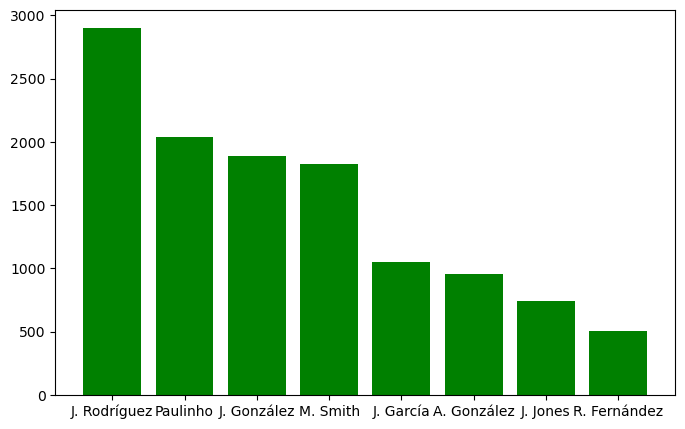

In [64]:
plt.figure(figsize=(8,5))
plt.bar(list(player_salary['Name'].value_counts()[0:8].keys()),list(player_salary['Wage(€)'].value_counts()[0:8]),color='g')
plt.show

In [65]:
Germany=fifa[fifa['Nationality']=='Germany']
Germany.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
9,192448,M. ter Stegen,Marc-André ter Stegen,https://cdn.sofifa.com/players/192/448/21_60.png,http://sofifa.com/player/192448/marc-andre-ter...,Germany,28,90,93,FC Barcelona,2014 ~ 2022,2014,2022,8,Contract,GK,187,85,Right,90,GK,2014-07-01,NaN,110000000,260000,147700000,118,18,14,11,61,14,144,21,18,12,63,30,254,38,50,37,86,43,268,66,79,35,78,10,171,43,22,11,70,25,70,48,25,13,10,439,88,85,88,88,90,1442,484,4,1★,Medium,Medium,3 ★,88,85,88,90,45,88,130,2014,Jul,1
14,167495,M. Neuer,Manuel Neuer,https://cdn.sofifa.com/players/167/495/21_60.png,http://sofifa.com/player/167495/manuel-neuer/2...,Germany,34,89,89,FC Bayern München,2011 ~ 2023,2011,2023,12,Contract,GK,193,92,Right,89,GK,2011-07-01,NaN,17500000,130000,47900000,119,15,13,25,55,11,160,30,14,11,59,46,286,54,60,51,86,35,284,68,77,43,80,16,188,29,30,12,70,47,70,38,17,10,11,440,87,87,91,86,89,1515,497,4,1★,Medium,Medium,5 ★,87,87,91,89,57,86,118,2011,Jul,1
20,212622,J. Kimmich,Joshua Kimmich,https://cdn.sofifa.com/players/212/622/21_60.png,http://sofifa.com/player/212622/joshua-kimmich...,Germany,25,88,90,FC Bayern München,2015 ~ 2023,2015,2023,8,Contract,"CDM, RB",176,73,Right,88,CDM,2015-07-01,NaN,103000000,145000,112100000,383,91,66,72,87,67,400,83,85,61,86,85,399,77,66,84,88,84,403,78,79,95,67,84,379,89,82,80,84,44,85,245,82,84,79,60,8,15,7,15,15,2269,473,4,3★,High,Medium,3 ★,71,72,86,84,81,79,339,2015,Jul,1


In [67]:
Germany.sort_values(by=['Height(cm)'],ascending=False).head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
9724,236831,A. Seydel,Aaron Seydel,https://cdn.sofifa.com/players/236/831/21_60.png,http://sofifa.com/player/236831/aaron-seydel/2...,Germany,24,65,71,SV Darmstadt 98,2020 ~ 2022,2020,2022,2,Contract,"ST, LM, CAM",199,90,Left,67,ST,2020-08-06,NaN,1100000,5000,1400000,307,59,62,69,58,59,248,68,43,31,35,71,281,67,69,53,58,34,311,66,63,49,77,56,251,55,19,63,59,55,68,75,25,28,22,55,12,9,14,11,9,1528,341,4,3★,Medium,Low,1 ★,68,61,53,65,29,65,7,2020,Aug,6
16100,239101,T. Brinkmann,Till Brinkmann,https://cdn.sofifa.com/players/239/101/21_60.png,http://sofifa.com/player/239101/till-brinkmann...,Germany,24,59,65,SC Verl,2020 ~ 2021,2020,2021,1,Contract,GK,199,94,Right,59,GK,2020-07-31,NaN,300000,500,264000,61,11,8,10,25,7,65,6,14,14,21,10,135,21,25,15,54,20,205,46,47,28,78,6,72,16,12,5,22,17,33,35,10,14,11,296,60,62,61,56,57,869,319,2,1★,Medium,Medium,1 ★,60,62,61,57,23,56,2,2020,Jul,31
1040,199833,L. Unnerstall,Lars Unnerstall,https://cdn.sofifa.com/players/199/833/21_60.png,http://sofifa.com/player/199833/lars-unnerstal...,Germany,29,77,78,PSV,2018 ~ 2021,2018,2021,3,Contract,GK,198,103,Right,77,GK,2018-07-01,NaN,8000000,15000,10300000,74,10,13,10,26,15,83,16,13,11,24,19,178,28,37,19,74,20,224,55,40,35,82,12,128,36,21,13,42,16,58,43,11,17,15,379,77,76,73,75,78,1109,412,1,1★,Medium,Medium,1 ★,77,76,73,78,33,75,36,2018,Jul,1


In [68]:
player_s = fifa[['Name', 'Wage(€)', 'Nationality']]
player_s.head(3)

,Name,Wage(€),Nationality
0,L. Messi,560000,Argentina
1,Cristiano Ronaldo,220000,Portugal
2,J. Oblak,125000,Slovenia


In [69]:
manchester_city=fifa[fifa['Club']=='Manchester City']
manchester_city['Nationality'].value_counts()

England          12
Spain             4
Brazil            3
Portugal          3
France            2
Netherlands       2
Belgium           1
Argentina         1
Algeria           1
Germany           1
Ukraine           1
United States     1
Wales             1
Name: Nationality, dtype: int64

In [70]:
manchester_city.sort_values(by=['Dribbling'],ascending=False).head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
31,218667,Bernardo Silva,Bernardo Mota Carvalho e Silva,https://cdn.sofifa.com/players/218/667/21_60.png,http://sofifa.com/player/218667/bernardo-mota-...,Portugal,25,87,88,Manchester City,2017 ~ 2025,2017,2025,8,Contract,"RW, CAM, CM",173,64,Left,87,RW,2017-07-01,NaN,95000000,230000,115500000,371,85,79,51,86,70,411,92,84,67,76,92,434,85,78,94,85,92,350,76,51,93,54,76,356,69,49,85,85,68,87,148,49,59,40,54,9,10,14,12,9,2124,451,3,4★,High,High,2 ★,81,77,83,92,51,67,242,2017,Jul,1
18,202652,R. Sterling,Raheem Sterling,https://cdn.sofifa.com/players/202/652/21_60.png,http://sofifa.com/player/202652/raheem-sterlin...,England,25,88,90,Manchester City,2015 ~ 2023,2015,2023,8,Contract,"LW, RW",170,69,Right,88,LW,2015-07-14,NaN,114500000,270000,139600000,360,78,85,46,84,67,387,90,77,63,69,88,464,96,90,94,90,94,358,78,57,79,65,79,332,59,30,92,82,69,80,147,47,53,47,63,15,12,12,15,9,2111,455,3,4★,High,Medium,3 ★,93,81,79,90,45,67,205,2015,Jul,14
75,204485,R. Mahrez,Riyad Mahrez,https://cdn.sofifa.com/players/204/485/21_60.png,http://sofifa.com/player/204485/riyad-mahrez/2...,Algeria,29,85,85,Manchester City,2018 ~ 2023,2018,2023,5,Contract,"RW, RM",179,67,Left,85,RW,2018-07-10,NaN,53000000,210000,69400000,366,83,79,48,80,76,418,90,84,78,75,91,427,87,79,92,81,88,350,79,60,76,55,80,321,48,39,80,84,70,84,98,45,31,22,54,15,9,13,11,6,2034,430,4,5★,Medium,Medium,3 ★,83,79,81,90,38,59,112,2018,Jul,10
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,2015,2023,8,Contract,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaN,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4★,High,High,4 ★,76,86,93,88,64,78,207,2015,Aug,30
17,153079,S. Agüero,Sergio Agüero,https://cdn.sofifa.com/players/153/079/21_60.png,http://sofifa.com/player/153079/sergio-aguero/...,Argentina,32,89,89,Manchester City,2011 ~ 2021,2011,2021,10,Contract,ST,173,70,Right,89,ST,2011-07-28,NaN,83500000,300000,98100000,411,70,94,78,83,86,397,88,83,73,64,89,424,79,78,84,92,91,403,89,78,78,74,84,341,65,24,94,83,75,91,83,30,29,24,59,13,15,6,11,14,2118,439,4,4★,High,Medium,4 ★,78,90,77,88,33,73,154,2011,Jul,28
